In [1]:
import numpy as np
import pandas as pd

# K-Means Algorithm

K-Means algorithm is a clustring algorithm. It is also a classic Expectation-Maximization algorithm.<br> 
Given a set of observations (x1, x2, ..., xn), where each observation is a d-dimensional real vector, k-means clustering aims to partition the n observations into k (≤ n) sets S = {S1, S2, ..., Sk} so as to minimize the within-cluster sum of squares (WCSS) (i.e. variance) <br>
The Step is as follows:
1. Randomly select k "cluster centers" from the data set;<br>
2. For each iteration (iterate through all points):<br>
(1). Find the nearest center for each point, and store the cluster for each center; <br>
(2). Calculate the new center for each cluster; <br>
(3). If there are no change of the means, end the loop; otherwise iterate. <br>

In [2]:
class KMeans():
    def __init__(self, k = 3, num_iter = 1000):
        """
            Some initializations, if neccesary
            
            Parameter:
                k: Number of clusters we are trying to classify
                num_iter: Number of iterations we are going to loop
        """
        
        self.model_name = 'KMeans'
        self.k = k
        self.num_iter = num_iter
        self.centers = None
        self.RM = None
        
    def train(self, X):
        """
            Train the given dataset
            
            Parameter:
                X: Matrix or 2-D array. Input feature matrix.
                
            Return:
                self: the whole model containing relevant information
        """
        
        r, c = X.shape
        centers = []
        RM = np.zeros((r, self.k))
        
        """
            TODO: 1. Modify the following code to randomly choose the initial centers
        """
        initials = [1,1,1]
        for i in initials:
            centers.append(X[i, :])
        centers = np.array(centers)
        
        for i in range(self.num_iter):
            for j in range(r):
                """
                    TODO: 2. Modify the following code to update the Relation Matrix
                """
                distance = [0]
                minpos = 0
                
                temp_rm = np.zeros(self.k)
                temp_rm[minpos] = 1
                RM[j,:] = temp_rm
            new_centers = centers.copy()
            for l in range(self.k):
                """
                    TODO: 3. Modify the following code to update the centers
                """
                row_index = (RM[:, l] == 1).flatten()
                all_l = X[row_index, :]
                new_centers[l, :] = [0]
            if np.sum(new_centers - centers) < 0.000000000000000000001:
                self.centers = new_centers
                self.RM = RM
                return self
            centers = new_centers
        self.centers = centers
        self.RM = RM
        return self

In [28]:
import matplotlib.pyplot as plt
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
Y = iris.target

In [29]:
X = X[:,2:4]

In [32]:
clf = KMeans(k = 3)
model = clf.train(X)

(48, 2)
(50, 2)
(52, 2)


D:\Software\Anaconda\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  """


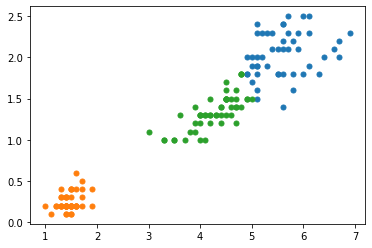

In [33]:
r, c = model.RM.shape
groups = []
for i in range(c):
    index = [model.RM[:,i] == 1]
    groups.append(X[index])
fig, ax = plt.subplots()
ax.margins(0.05)
for group in groups:
    print(group.shape)
    ax.plot(group[:,0], group[:,1], marker='o', linestyle='', ms=5)

In [34]:
iris = datasets.load_iris()
X = iris.data
Y = iris.target
X = X[:,[0,2]]

(72, 2)
(59, 2)
(19, 2)


D:\Software\Anaconda\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  import sys


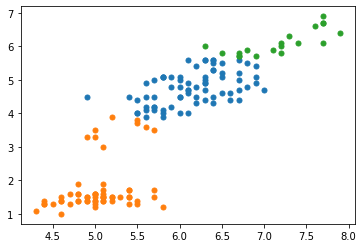

In [37]:
clf = KMeans(k = 3)
model = clf.train(X)
r, c = model.RM.shape
groups = []
for i in range(c):
    index = [model.RM[:,i] == 1]
    groups.append(X[index])
fig, ax = plt.subplots()
ax.margins(0.05)
for group in groups:
    print(group.shape)
    ax.plot(group[:,0], group[:,1], marker='o', linestyle='', ms=5)

## 3 dimension

In [56]:
iris = datasets.load_iris()
X = iris.data
Y = iris.target
X = X[:,1:4]

In [57]:
clf = KMeans(k = 3)
model = clf.fit(X)

In [58]:
from mpl_toolkits.mplot3d import Axes3D

In [59]:
groups = []
r, c = model.RM.shape
for i in range(c):
    index = [model.RM[:,i] == 1]
    groups.append(X[index])

D:\Software\Anaconda\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  """


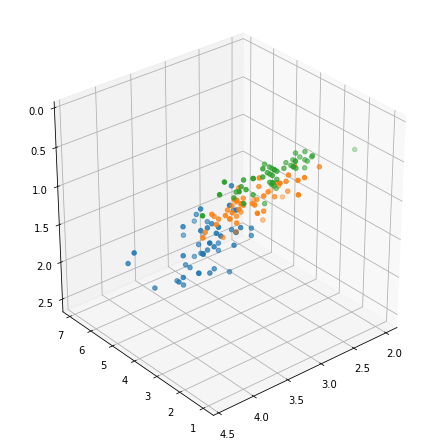

In [60]:
fig = plt.figure(figsize = (6, 6))
ax = Axes3D(fig, elev = -150, azim = 130)
for group in groups:
    ax.scatter(group[:,0], group[:,1], group[:,2], marker='o')

Note: We should expect different results every time we run Kmeans as the centers are randomly initialized.

# Gaussian Mixture

Gaussian Mixture Algorithm is a softer version of the k-means algorithm. It is also a classic example of the Expectation-Maximization Algorithm. <br>
In Gaussian Mixture Algorithm, we model the data as coming from a mixture of Gaussians.<br>
In this example, we will be using a randomly generated Gaussian Distribution. <br>

In [9]:
def gaussian(X, mu, cov):
    """ 
        Fucntion to create mixtures using the Given matrix X, given covariance and given mu

        Return:
        transformed x.
    """
    # X should be matirx-like
    n = X.shape[1]
    diff = (X - mu).T
    return np.diagonal(1 / ((2 * np.pi) ** (n / 2) * np.linalg.det(cov) ** 0.5) * np.exp(-0.5 * np.dot(np.dot(diff.T, np.linalg.inv(cov)), diff))).reshape(-1, 1)

In [62]:
from sklearn.datasets import make_blobs

In [90]:
X, y = make_blobs(n_samples=500, n_features=3, cluster_std=2)

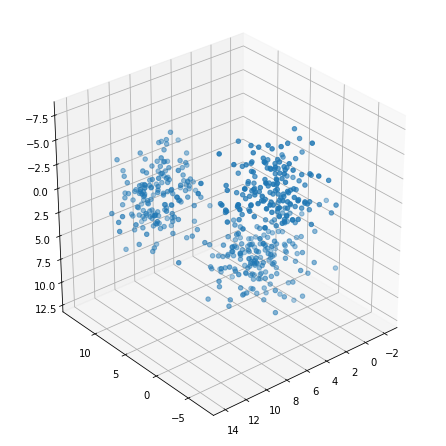

In [91]:
fig = plt.figure(figsize = (6, 6))
ax = Axes3D(fig, elev = -150, azim = 130)
ax.scatter(X[:,0], X[:,1], X[:,2], marker='o')

In [10]:
def initialize_clusters(X, n_clusters):
    """ 
        Initialize the clusters by storing the information in the data matrix X into the clusters

        Parameter:
            X: Input feature matrix
            n_clusters: Number of clusters we are trying to classify

        Return:
            cluster: List of clusters. Each cluster center is calculated by the KMeans algorithm above.
    """
    clusters = []
    index = np.arange(X.shape[0])
    
    # We use the KMeans centroids to initialise the GMM
    
    kmeans = KMeans().fit(X)
    mu_k = kmeans.centers
    
    for i in range(n_clusters):
        clusters.append({
            'w_k': 1.0 / n_clusters,
            'mu_k': mu_k[i],
            'cov_k': np.identity(X.shape[1], dtype=np.float64)
        })
        
    return clusters

In [11]:
def expectation_step(X, clusters):
    """ 
        "E-Step" for the GM algorithm

        Parameter:
            X: Input feature matrix
            clusters: List of clusters
    """
    totals = np.zeros((X.shape[0], 1), dtype=np.float64)
    
    for cluster in clusters:
        w_k = cluster['w_k']
        mu_k = cluster['mu_k']
        cov_k = cluster['cov_k']
        
        """
            TODO: 4. Calculate the numerator part of the cluster posterior
        """
        
        posterior = [0.0]
        
        for i in range(X.shape[0]):
            """
            TODO: 5. Calculate the denominator part of the cluster posterior
            """
            totals[i] = 0
        
        cluster['posterior'] = posterior
        cluster['totals'] = totals
        
    
    for cluster in clusters:
        """
            TODO: 6. Calculate the cluster posterior using totals
        """
        cluster['postrior'] = 1

In [12]:
def maximization_step(X, clusters):
    """ 
        "M-Step" for the GM algorithm

        Parameter:
            X: Input feature matrix
            clusters: List of clusters
    """
    N = float(X.shape[0])
  
    for cluster in clusters:
        posterior = cluster['posterior']
        cov_k = np.zeros((X.shape[1], X.shape[1]))
        
        """
            TODO: 7. Calculate the new cluster data
        """        
        N_k = np.sum(posterior, axis=0)
        w_k = 1
        mu_k = [0]
        
        for j in range(X.shape[0]):
            cov_k = [0]
            
        cov_k /= N_k 
        
        cluster['w_k'] = w_k
        cluster['mu_k'] = mu_k
        cluster['cov_k'] = cov_k

In [13]:
def get_likelihood(X, clusters):
    likelihood = []
    sample_likelihoods = np.log(np.array([cluster['totals'] for cluster in clusters]))
    return np.sum(sample_likelihoods), sample_likelihoods

In [85]:
def train_gmm(X, n_clusters, n_epochs):
    clusters = initialize_clusters(X, n_clusters)
    likelihoods = np.zeros((n_epochs, ))
    scores = np.zeros((X.shape[0], n_clusters))

    for i in range(n_epochs):
      
        expectation_step(X, clusters)
        maximization_step(X, clusters)

        likelihood, sample_likelihoods = get_likelihood(X, clusters)
        likelihoods[i] = likelihood
        
    for i, cluster in enumerate(clusters):
        scores[:, i] = np.log(cluster['w_k']).reshape(-1)
        
    return clusters, likelihoods, scores, sample_likelihoods

In [92]:
clusters, likelihoods, scores, sample_likelihoods = train_gmm(X, 3, 100)

In [20]:
from sklearn.cluster import KMeans

In [93]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, max_iter=50).fit(X)
gmm_scores = gmm.score_samples(X)

print('Means by sklearn:\n', gmm.means_)
print('Means by our implementation:\n', np.array([cluster['mu_k'].tolist() for cluster in clusters]))
print('Scores by sklearn:\n', gmm_scores[0:20])
print('Scores by our implementation:\n', sample_likelihoods.reshape(-1)[0:20])

Means by sklearn:
 [[ 4.39074551  1.20199258  6.3022327 ]
 [ 8.98839935  9.51954291  1.05759375]
 [ 5.35315547 -2.23816274 -2.56267013]]
Means by our implementation:
 [[ 5.35182907 -2.2367173  -2.55786065]
 [ 8.9887496   9.52143291  1.05640879]
 [ 4.39280888  1.20571767  6.30498601]]
Scores by sklearn:
 [-6.13726675 -7.51911416 -6.89281068 -9.43670026 -8.6028534  -7.3616024
 -6.53936695 -7.22989094 -6.20257524 -6.23528246 -9.16562507 -8.4825674
 -9.5302818  -7.32150604 -7.52215321 -7.45975524 -7.10790769 -6.08008756
 -7.17619947 -8.18014084]
Scores by our implementation:
 [-6.13743663 -7.51459162 -6.89631166 -9.43752363 -8.60238419 -7.36121834
 -6.53810162 -7.22983957 -6.20161164 -6.23643104 -9.17158307 -8.47802193
 -9.53262406 -7.32109316 -7.52071805 -7.4624631  -7.1077944  -6.07923737
 -7.17524634 -8.18078416]
